In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('merged_response.csv')

In [41]:
df.head()

,Elapsed Time (ms),Response Time (ms),Alphabet,Correct,Error_Type,Pitch,Yaw,Roll
0,1267,1267,P,Yes,None,179.66,184.47,175.59
1,3334,1322,O,Yes,None,177.36,176.51,176.92
2,4805,790,N,Yes,None,175.94,185.27,176.46
3,6994,971,C,Yes,None,174.71,167.20,175.75
4,8762,738,P,Yes,None,177.52,185.26,173.84


In [31]:
decomposition = sm.tsa.seasonal_decompose(df[' Pitch'], model='additive', period=60*60)

# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 8))
ax1.set_title('Original Data')
ax1.plot(df[' Pitch'])
ax2.set_title('Trend')
ax2.plot(decomposition.trend)
ax3.set_title('Seasonal')
ax3.plot(decomposition.seasonal)
ax4.set_title('Residual')
ax4.plot(decomposition.resid)
plt.tight_layout()
plt.show()

ValueError: x must have 2 complete cycles requires 7200 observations. x only has 1083 observation(s)

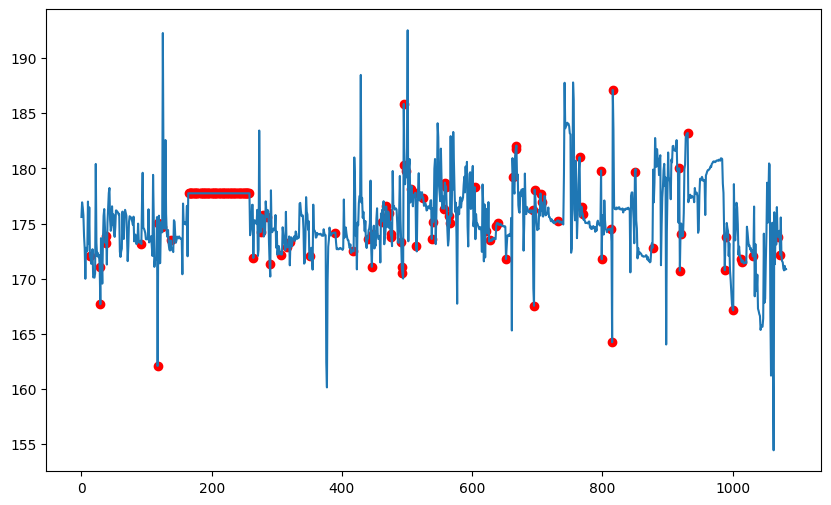

In [62]:
plt.figure(figsize=(10, 6))
incorrect = df.query('Correct == " No"')
plt.plot(df.index, df['Roll'])
plt.scatter(incorrect.index, incorrect['Roll'], color='red')